In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import random
random.seed(42)

In [4]:
df = pd.read_csv(r"C:\Users\oscar\Downloads\Customer_Data.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
df.describe(include='all')

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
unique,8950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,NaN,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,NaN,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,NaN,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,NaN,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000


### Data Preprocessing

In [7]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Just a few missing value in the data, so I will try to drop all of them and see the change to the dataset

In [8]:
df_2 = df.dropna()

df_2.describe(include='all')

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
unique,8636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,NaN,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,NaN,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,NaN,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,NaN,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000


The mean and the distribution of 'MINIMUM_PAYMENTS' column does not change drastically, therefore we will drop the rows with missing value.

Drop the CUST_ID column, as it is not useful

In [9]:
df_2 = df_2.drop(columns=['CUST_ID'])

Drop the record with CREDIT_LIMIT < MINIMUM_PAYMENTS, since it is not reasonable.

In [10]:
df_2 = df_2[df_2['CREDIT_LIMIT'] >= df_2['MINIMUM_PAYMENTS']]

Normalize the data

In [11]:
df_2_norm = df_2/df_2.mean()

### EDA

Correlation Check

<Axes: >

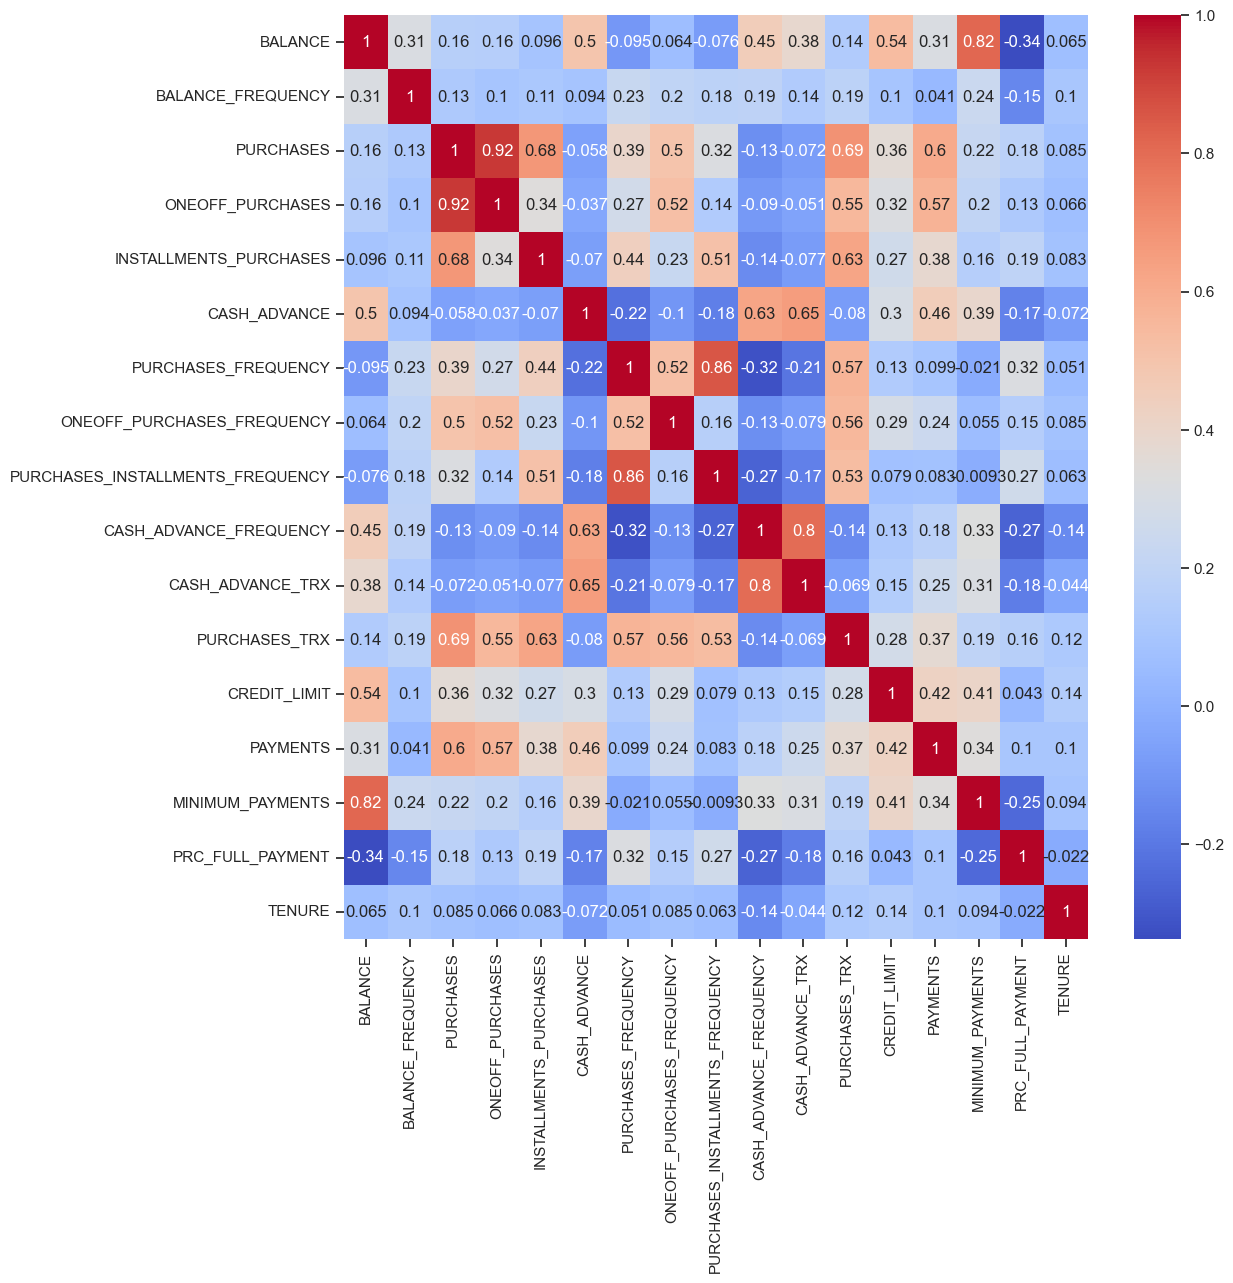

In [12]:
import seaborn as sns

plt.figure(figsize = (12, 12))
sns.heatmap(df_2_norm.corr(), annot=True, cmap='coolwarm', 
            xticklabels=df_2_norm.columns,
            yticklabels=df_2_norm.columns)



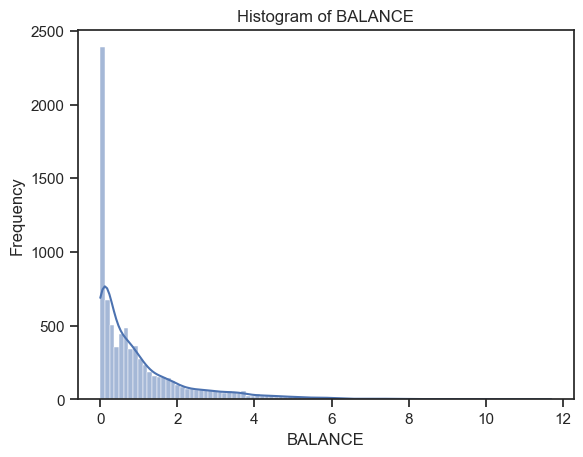

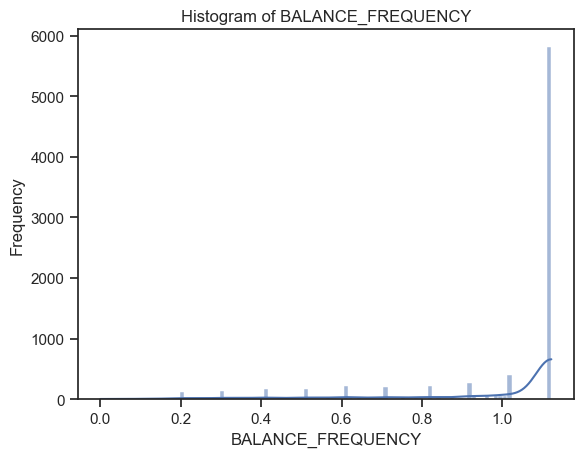

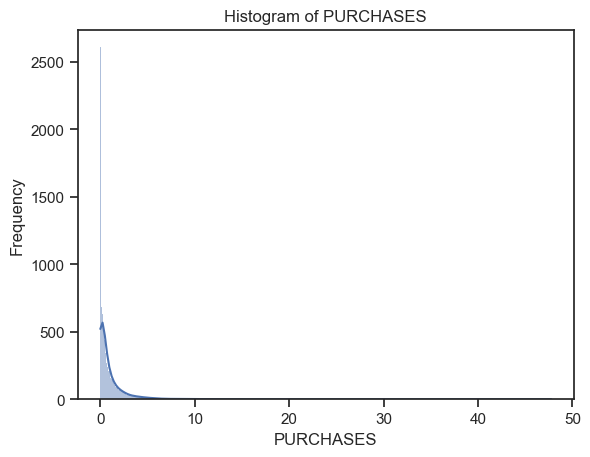

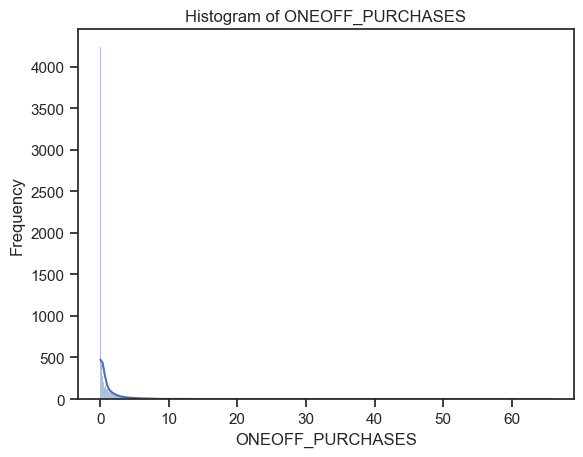

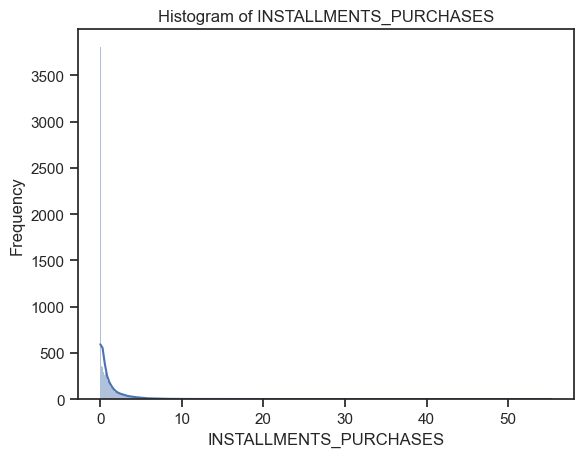

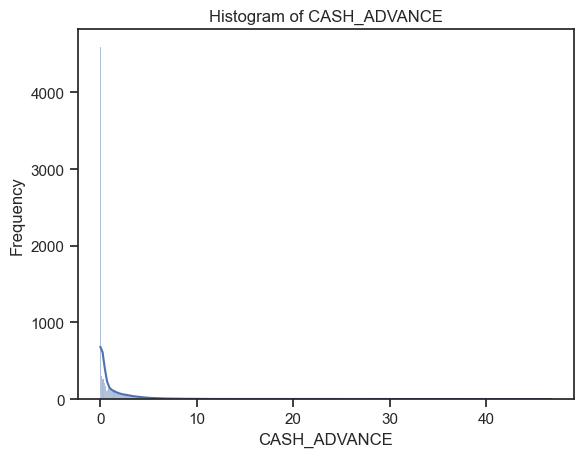

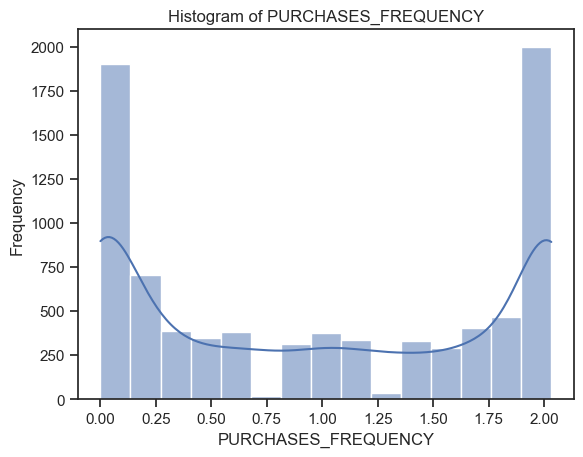

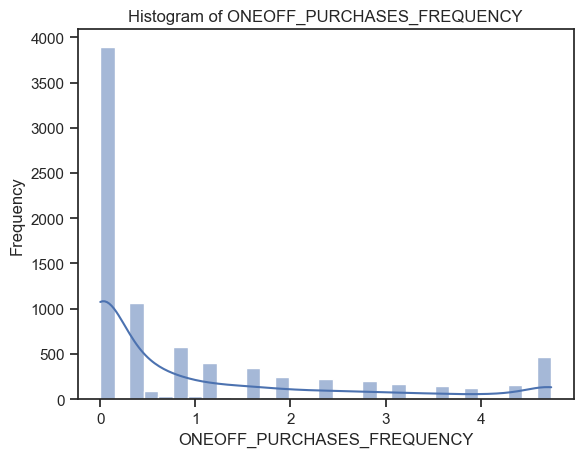

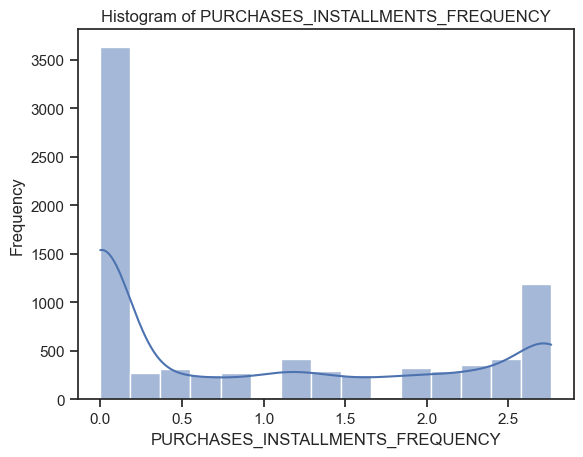

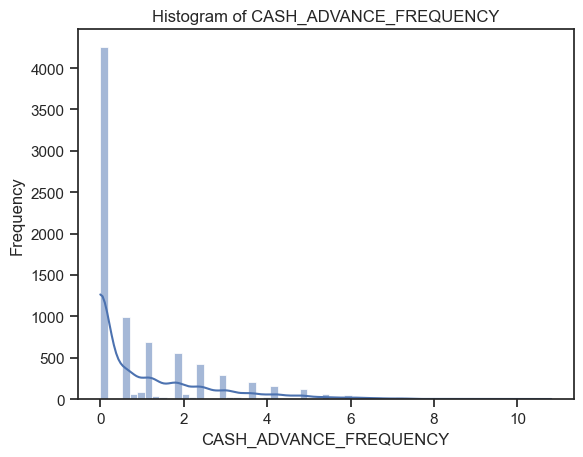

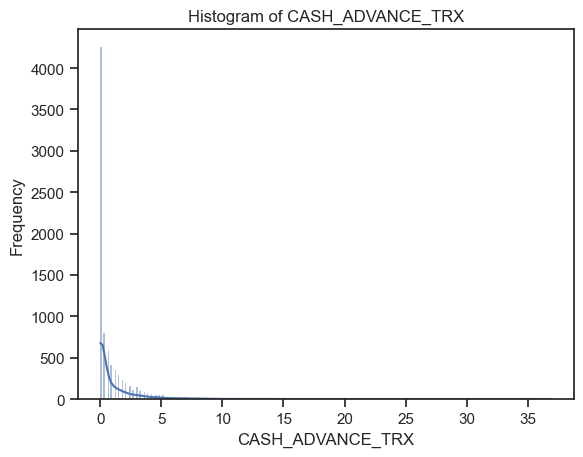

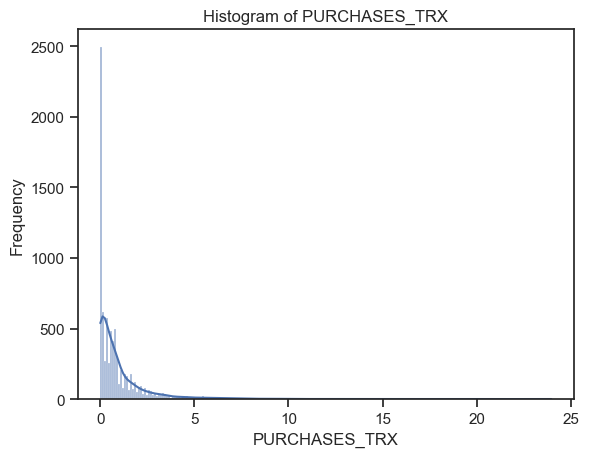

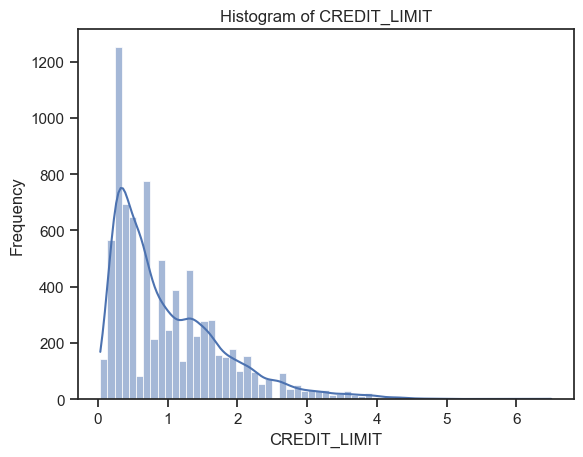

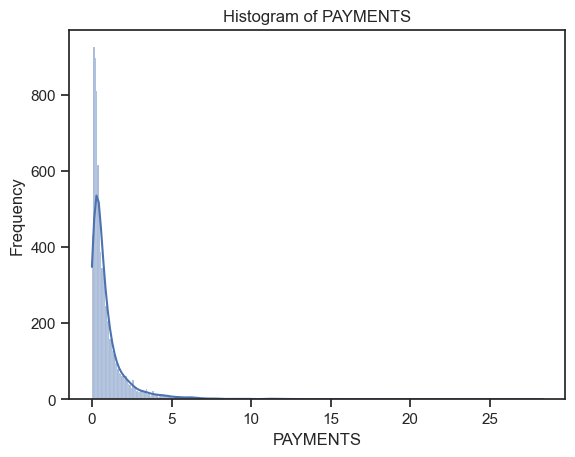

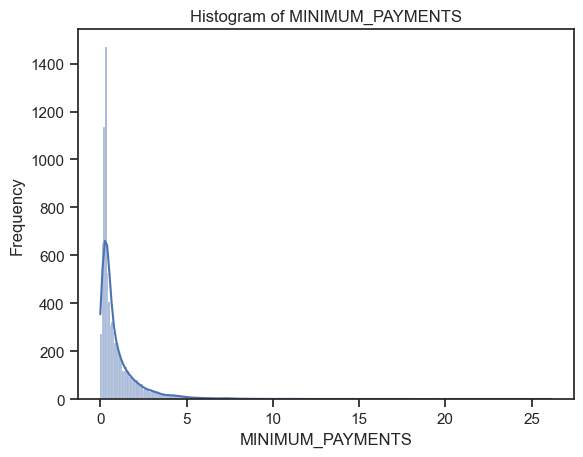

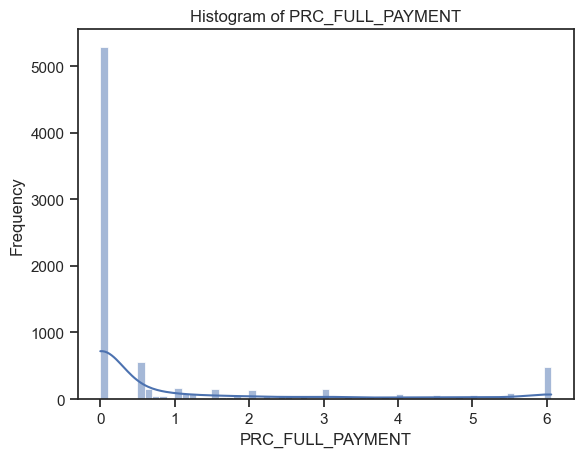

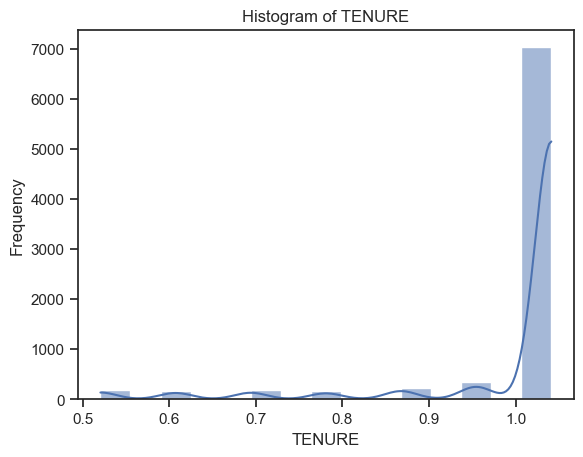

In [13]:
# Create a histogram for each column in df_2_norm
for column in df_2_norm.columns:
    sns.histplot(df_2_norm[column], kde=True)  # kde=True adds a Kernel Density Estimate plot
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

By looking at the pairplot and histogram "BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS" columns are the best columns. Since they are having low correlation to most of the features amd the histogram show that these features have right skewed distribution, so these features can create a good clustering.

In [14]:
# choose the columns for building the clustering model
best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS"]

In [15]:
df_final = df_2_norm[best_cols]

In [16]:
df_final.shape

(8290, 6)

### Clustering: </br>
K-Mean, Agglomerative Clustering and DBSCAN will be implemented and compared. 

In [17]:
X = df_final.copy()

#### K-Mean

Silhouette-Score for 2 Clusters:  0.6089531960648725        Inertia:  95855.8574635578
Silhouette-Score for 3 Clusters:  0.5860255345257832        Inertia:  75301.96872228413
Silhouette-Score for 4 Clusters:  0.5553554360032114        Inertia:  63087.25341203871
Silhouette-Score for 5 Clusters:  0.5140199495627774        Inertia:  52944.66451364152
Silhouette-Score for 6 Clusters:  0.4694455748152185        Inertia:  47728.66794179611
Silhouette-Score for 7 Clusters:  0.41559598989187774        Inertia:  43403.41536069324
Silhouette-Score for 8 Clusters:  0.3993912381187546        Inertia:  39283.55465303449
Silhouette-Score for 9 Clusters:  0.4020928372093821        Inertia:  36688.420195516796
Silhouette-Score for 10 Clusters:  0.4006460761909093        Inertia:  34494.69583600351
Silhouette-Score for 11 Clusters:  0.3092818779349208        Inertia:  32664.182164804442
Silhouette-Score for 12 Clusters:  0.3050954294233582        Inertia:  31066.155627112064
Silhouette-Score for 13 Cl

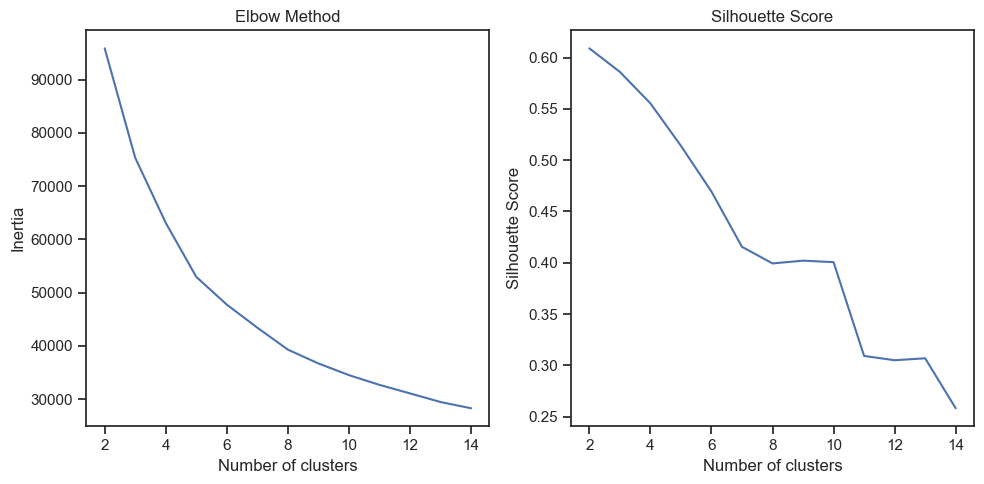

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

inertia = []
silhouette_scores = []

for i in range(2, 15):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    labels = kmeans.labels_
    
# Calculate the silhouette_sco
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)
    print('Silhouette-Score for', i,  'Clusters: ', silhouette_avg , '       Inertia: ',kmeans.inertia_)

# Silhouette Score
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, 15), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

if silhouette_scores:
    plt.subplot(1, 2, 2)
    plt.plot(range(2, 15), silhouette_scores)
    plt.title('Silhouette Score')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


The best number of cluster is 5. Since for the Elbow curve it has a low inertia (52944.66451364152) and high drop of inertia of 10142.58 when comparing to 4 cluster, for Silhouette Curve, it has a high Silhouette score of 0.5140199495627774.

#### Agglomerative Clustering

For 2 clusters, the silhouette score is 0.43
For 3 clusters, the silhouette score is 0.43
For 4 clusters, the silhouette score is 0.42
For 5 clusters, the silhouette score is 0.42
For 6 clusters, the silhouette score is 0.37
For 7 clusters, the silhouette score is 0.31
For 8 clusters, the silhouette score is 0.31
For 9 clusters, the silhouette score is 0.32
For 10 clusters, the silhouette score is 0.32


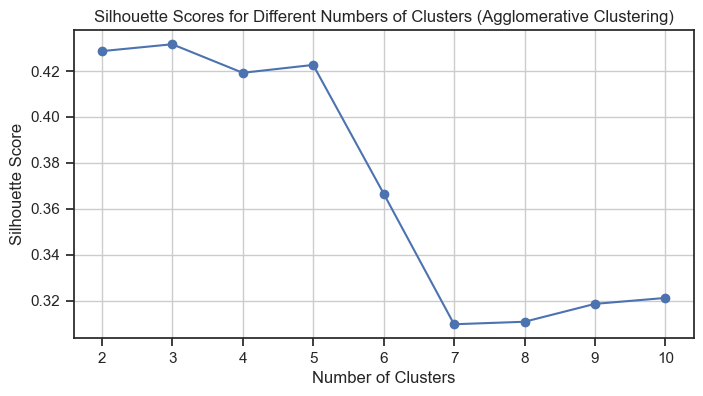

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

n_clusters_range = range(2, 11)
silhouette_scores = []

for n_clusters in n_clusters_range:
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = agg_clustering.fit_predict(X)
    
    # Calculate and store the silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
    # Print the silhouette score for each number of clusters
    print(f"For {n_clusters} clusters, the silhouette score is {silhouette_avg:.2f}")

# Plot the Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters (Agglomerative Clustering)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()


By looking at the Silhouette score, the best numbere of cluster is in range of 2-5 for Agglomerative Clustering. 

#### DBSCAN

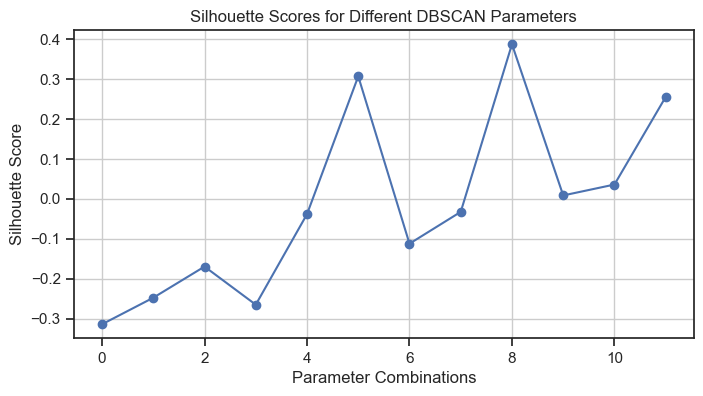

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

eps_values = [0.3, 0.4, 0.5, 0.6]  # Adjust the range of eps values as needed
min_samples_values = [5, 10, 15]  # Adjust the range of min_samples values as needed

silhouette_scores = []

# Iterate over different combinations of eps and min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(X)
        
        # Check if there is more than one cluster
        unique_labels = np.unique(cluster_labels)
        if len(unique_labels) > 1:
            # Calculate and store the silhouette score
            silhouette_avg = silhouette_score(X, cluster_labels)
            silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(range(len(silhouette_scores)), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different DBSCAN Parameters')
plt.xlabel('Parameter Combinations')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()


The Silhouette Curve shows that choosing Parameter Combination of 5, 8 and 11 are the best for DBSCAN.

### Evaluation of Model:</br>
For K-Mean, the best number of cluster is 5 with inertia: 52944.67, Silhouette-Score:  0.5140</br>
</br>
For Agglomerative Clustering, we can also choose 5 as the best number of cluster with Silhouette Score: 0.42</br>
</br>
For DBSCAN, we can also choose 5 as the best number of Parameter Combination with Silhouette Score: 0.32</br>
</br>
To conclude, 5 cluster is the best number of cluster since it has the high number of Silhouette Scores in all three models. K-Mean is the best model among all three models with the highest Silhouette Score in the same number of cluster. 

### Create the best Model: </br>
Choose 5 cluster and the K-Mean clustering

In [21]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

# create a 'cluster' column
df_final['cluster'] = labels

C:\Users\oscar\AppData\Local\Temp\ipykernel_12972\3285392738.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['cluster'] = labels


In [22]:
df_final.columns

Index(['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'cluster'],
      dtype='object')

### Interpretation of Clusters 

In [23]:
# Show the number of datapoint in each cluster
cluster_counts = df_final['cluster'].value_counts()
print(cluster_counts)

cluster
1    6253
0    1278
3     572
2     162
4      25
Name: count, dtype: int64


Calculate the mean of all 6 Features group by the cluster

In [24]:
# Mean of feature group by cluster
mean_df = df_final.groupby('cluster').mean().reset_index()

In [25]:
mean_df

,cluster,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
0,0,2.847428,0.559669,3.214505,1.593303,1.417159,2.622152
1,1,0.503755,0.600257,0.349497,0.764781,0.550703,0.550600
2,2,3.374965,0.957269,10.911069,2.143828,6.080956,3.014754
3,3,1.520526,5.264854,0.355500,1.814155,2.948144,1.526341
4,4,3.380847,26.190512,1.020801,3.463359,14.554946,5.381282


Plot the barplot for features' mena of all the cluster 

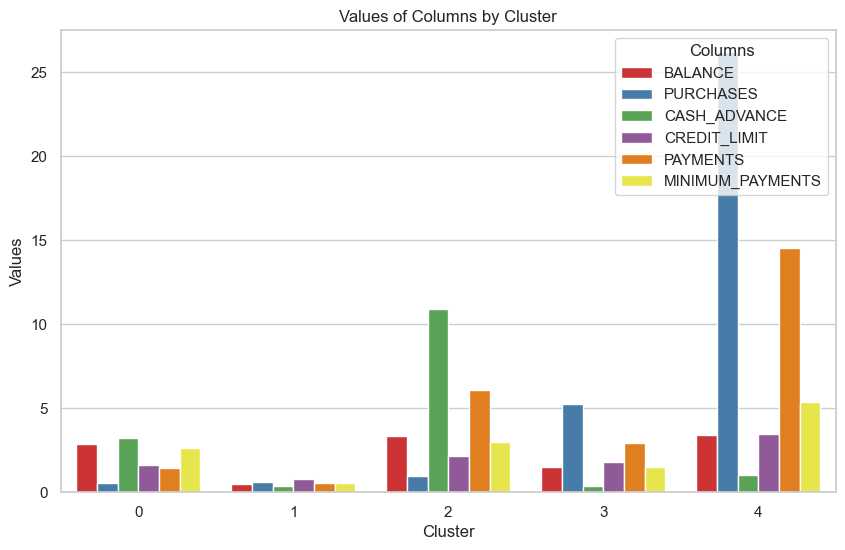

In [26]:
# Create a side-by-side bar chart
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

# Use melt to reshape the data for the chart
df_melted = pd.melt(mean_df, id_vars='cluster', var_name='Columns', value_name='Values')

# Create the bar chart
sns.barplot(x='cluster', y='Values', hue='Columns', data=df_melted, palette='Set1')

# Set labels and title
plt.xlabel('Cluster')
plt.ylabel('Values')
plt.title('Values of Columns by Cluster')

# Show the plot
plt.legend(title='Columns', loc='upper right')
plt.show()

By looking at the plot, it shows that PAYMENTS may be the most significant feature in distinguishing between clusters, as the there are relatively huge differentiation on the payment for all the clusters

In [27]:
mean_df.columns

Index(['cluster', 'BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
       'PAYMENTS', 'MINIMUM_PAYMENTS'],
      dtype='object')

#### First Cluster (cluster 0): Inactive, Cash-Dependent and moderate risk Users

c:\Users\oscar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


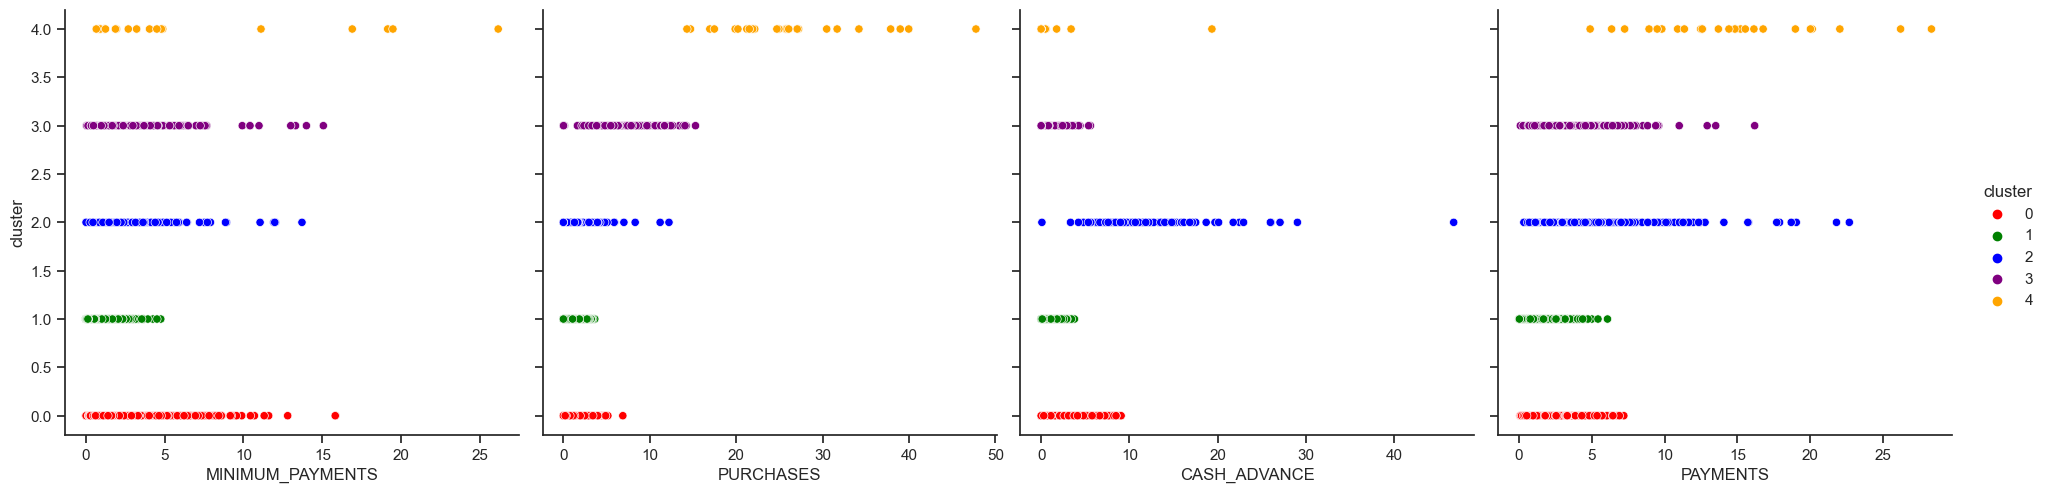

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the custom color palette
custom_palette = ['red', 'green', 'blue', 'purple', 'orange']

# Create a pairplot with the custom color palette
sns.set(style="ticks")
sns.pairplot(df_final, hue='cluster', x_vars=['MINIMUM_PAYMENTS', 'PURCHASES', 'CASH_ADVANCE', 'PAYMENTS'],
            y_vars=['cluster'], height=5, aspect=1, palette=custom_palette)
plt.show()


In [29]:
mean_df

,cluster,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
0,0,2.847428,0.559669,3.214505,1.593303,1.417159,2.622152
1,1,0.503755,0.600257,0.349497,0.764781,0.550703,0.550600
2,2,3.374965,0.957269,10.911069,2.143828,6.080956,3.014754
3,3,1.520526,5.264854,0.355500,1.814155,2.948144,1.526341
4,4,3.380847,26.190512,1.020801,3.463359,14.554946,5.381282


 This cluster relies on cash advances with the second highest mean of Cash Advance (3.214505), which means that the user are may access cash using credit card. This may indicate a need for immediate funds or cash-based transactions. This type of user are inactive user with the lowest purchases (0.559669) and second lowest payment (1.417159). Besides, they are quite risky as they are lacking of cash which the company set a high and high varied minimum payment for them which is the third highest among the clusters(2.622152). 

#### Second Cluster (cluster 1): Low financial activity users

c:\Users\oscar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


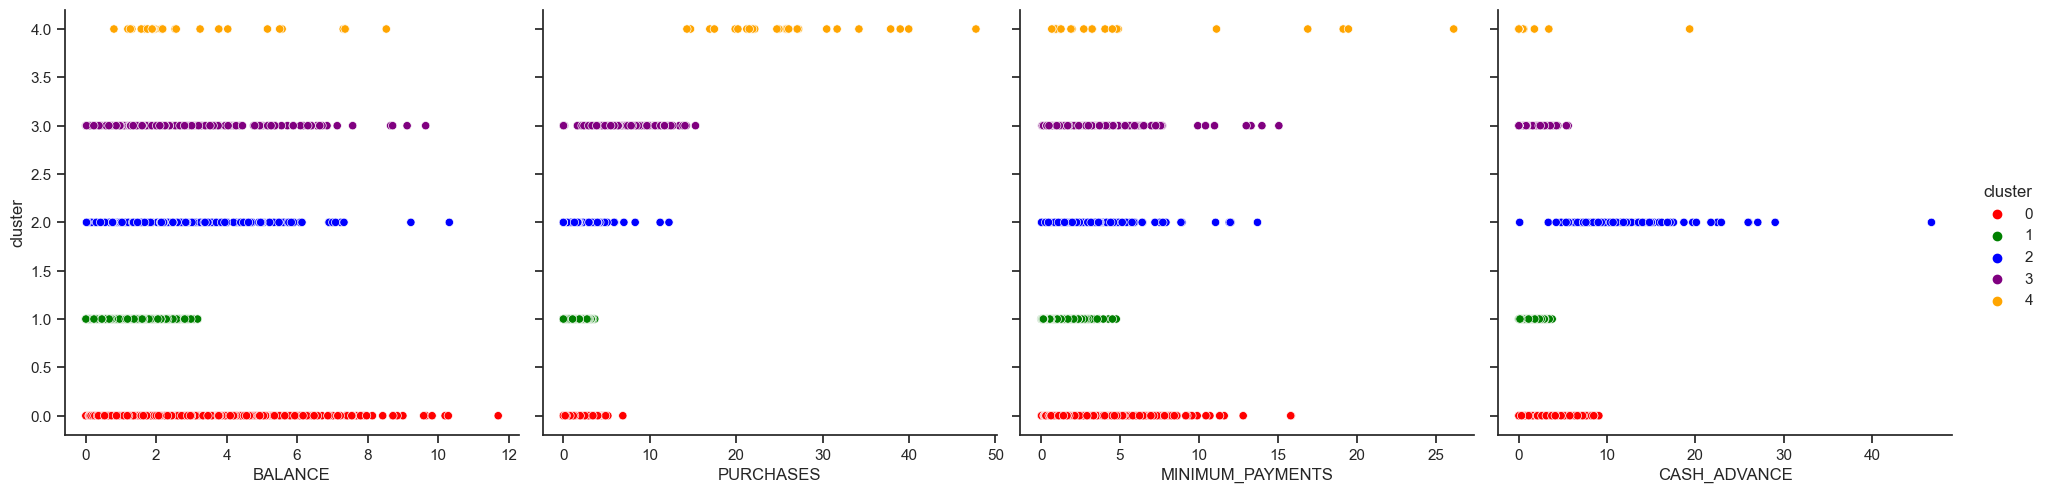

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the custom color palette
custom_palette = ['red', 'green', 'blue', 'purple', 'orange']

# Create a pairplot with the custom color palette
sns.set(style="ticks")
sns.pairplot(df_final, hue='cluster', x_vars=['BALANCE', 'PURCHASES', 'MINIMUM_PAYMENTS', 'CASH_ADVANCE'],
            y_vars=['cluster'], height=5, aspect=1, palette=custom_palette)
plt.show()


In [31]:
mean_df

,cluster,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
0,0,2.847428,0.559669,3.214505,1.593303,1.417159,2.622152
1,1,0.503755,0.600257,0.349497,0.764781,0.550703,0.550600
2,2,3.374965,0.957269,10.911069,2.143828,6.080956,3.014754
3,3,1.520526,5.264854,0.355500,1.814155,2.948144,1.526341
4,4,3.380847,26.190512,1.020801,3.463359,14.554946,5.381282


This cluster has limited financial activity, likely with lowest balances (0.503755), second lowest purchase activity (0.600257), lowest cash advances (0.349497). Moreover, this cluster is having lowest variation on all the features. Besides, this cluster is the least risky cluster with the lowest minimum payment (0.550600).Users of this cluster may have less financial engagement or lower credit card usage compared to other groups in the dataset. However, it is the largest cluster.

#### Third Cluster (cluster 2): High balace and Cash-Heavy Consumers

c:\Users\oscar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


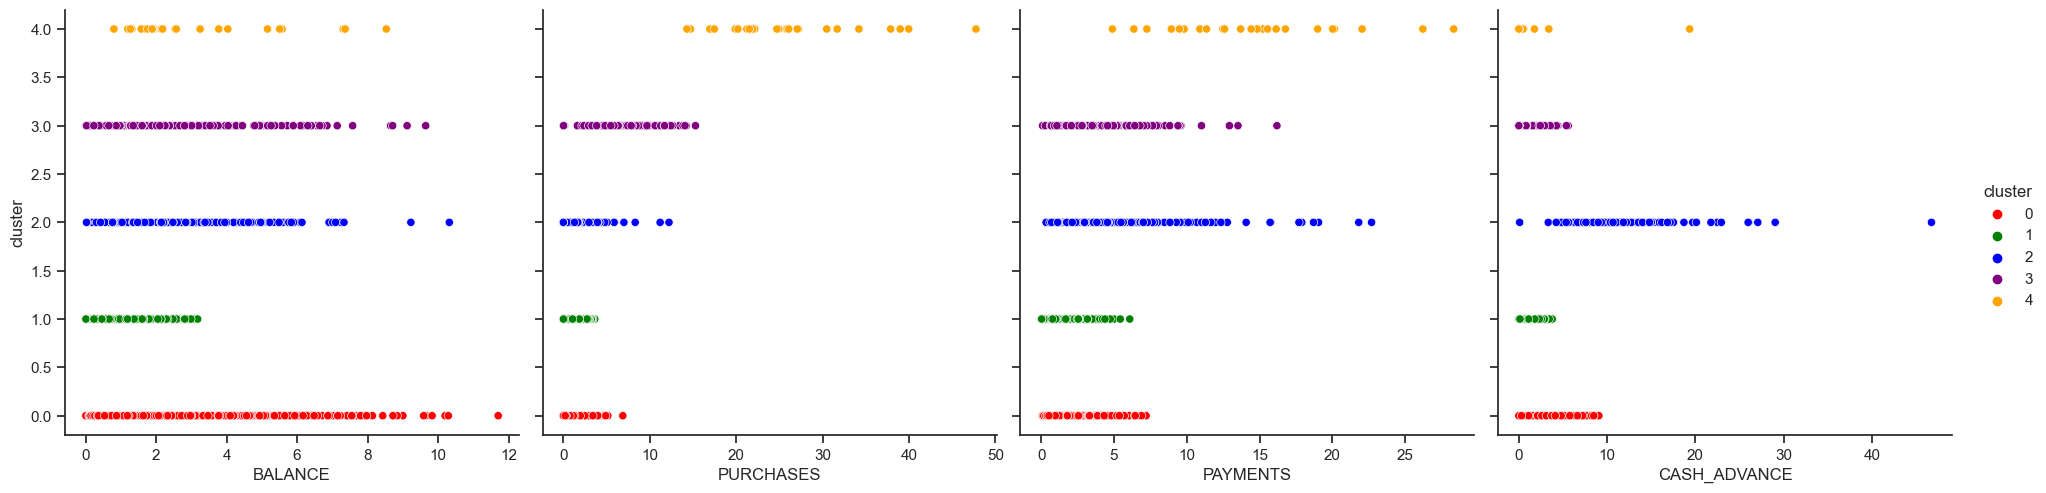

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the custom color palette
custom_palette = ['red', 'green', 'blue', 'purple', 'orange']

# Create a pairplot with the custom color palette
sns.set(style="ticks")
sns.pairplot(df_final, hue='cluster', x_vars=['BALANCE', 'PURCHASES', 'PAYMENTS', 'CASH_ADVANCE'],
            y_vars=['cluster'], height=5, aspect=1, palette=custom_palette)
plt.show()


c:\Users\oscar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


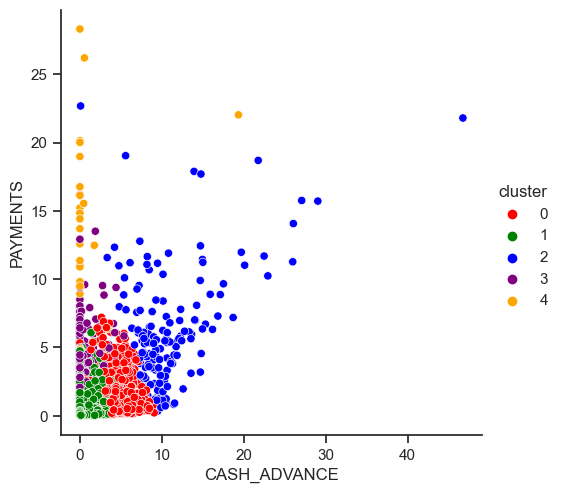

In [33]:
sns.pairplot(df_final, hue='cluster', x_vars=['CASH_ADVANCE'], y_vars=['PAYMENTS'],
            height=5, aspect=1, palette=custom_palette)

In [34]:
mean_df

,cluster,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
0,0,2.847428,0.559669,3.214505,1.593303,1.417159,2.622152
1,1,0.503755,0.600257,0.349497,0.764781,0.550703,0.550600
2,2,3.374965,0.957269,10.911069,2.143828,6.080956,3.014754
3,3,1.520526,5.264854,0.355500,1.814155,2.948144,1.526341
4,4,3.380847,26.190512,1.020801,3.463359,14.554946,5.381282


This cluster indicates that users in this cluster maintain high account balances (3.374965), and high available credit (2.143828), which it has the second highest mean in these 2 features. But this cluster of user have low purchases relative to their credit (0.957269), which is the Third highet among all the cluster. The users instead have a the highest and most varied cash advance (10.911069) and high payment (6.080956), which means that they use the credit card to access cash but not for making purchases.

#### Forth Cluster (cluster 3): The Active Users

c:\Users\oscar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


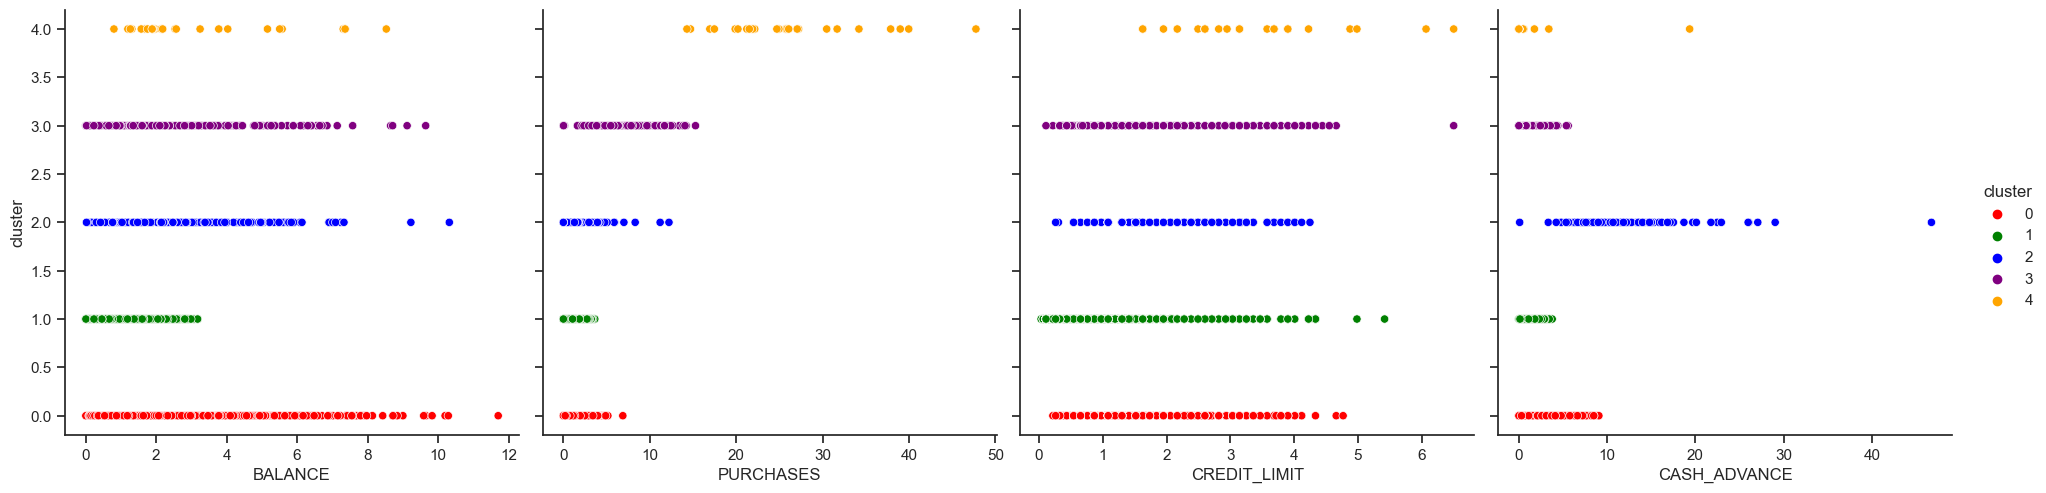

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the custom color palette
custom_palette = ['red', 'green', 'blue', 'purple', 'orange']

# Create a pairplot with the custom color palette
sns.set(style="ticks")
sns.pairplot(df_final, hue='cluster', x_vars=['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'CASH_ADVANCE'],
            y_vars=['cluster'], height=5, aspect=1, palette=custom_palette)
plt.show()


c:\Users\oscar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


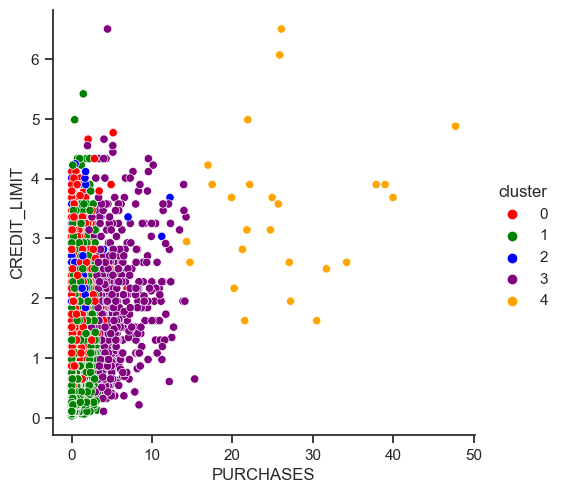

In [36]:
sns.pairplot(df_final, hue='cluster', x_vars=['PURCHASES'], y_vars=['CREDIT_LIMIT'],
            height=5, aspect=1, palette=custom_palette)

In [37]:
mean_df

,cluster,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
0,0,2.847428,0.559669,3.214505,1.593303,1.417159,2.622152
1,1,0.503755,0.600257,0.349497,0.764781,0.550703,0.550600
2,2,3.374965,0.957269,10.911069,2.143828,6.080956,3.014754
3,3,1.520526,5.264854,0.355500,1.814155,2.948144,1.526341
4,4,3.380847,26.190512,1.020801,3.463359,14.554946,5.381282


This Cluster indicates the user in this cluster are the active user of credit card puchase. This cluster is having the second lowest balance (1.520526) and widespreaded balance, but the second highest purchases (5.264854). This cluster does not rely on credit card for cash access, it has the second lowest cash_advance (0.355500). Moreove, this cluster is less risky with the Third highest credit limit (1.814155) and second lowest minimum_payment. Overall, this cluster are for the user who always use credit card purchase even with relatively low balance.

#### Fifth Cluster (cluster 4): The High Spending Users

c:\Users\oscar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


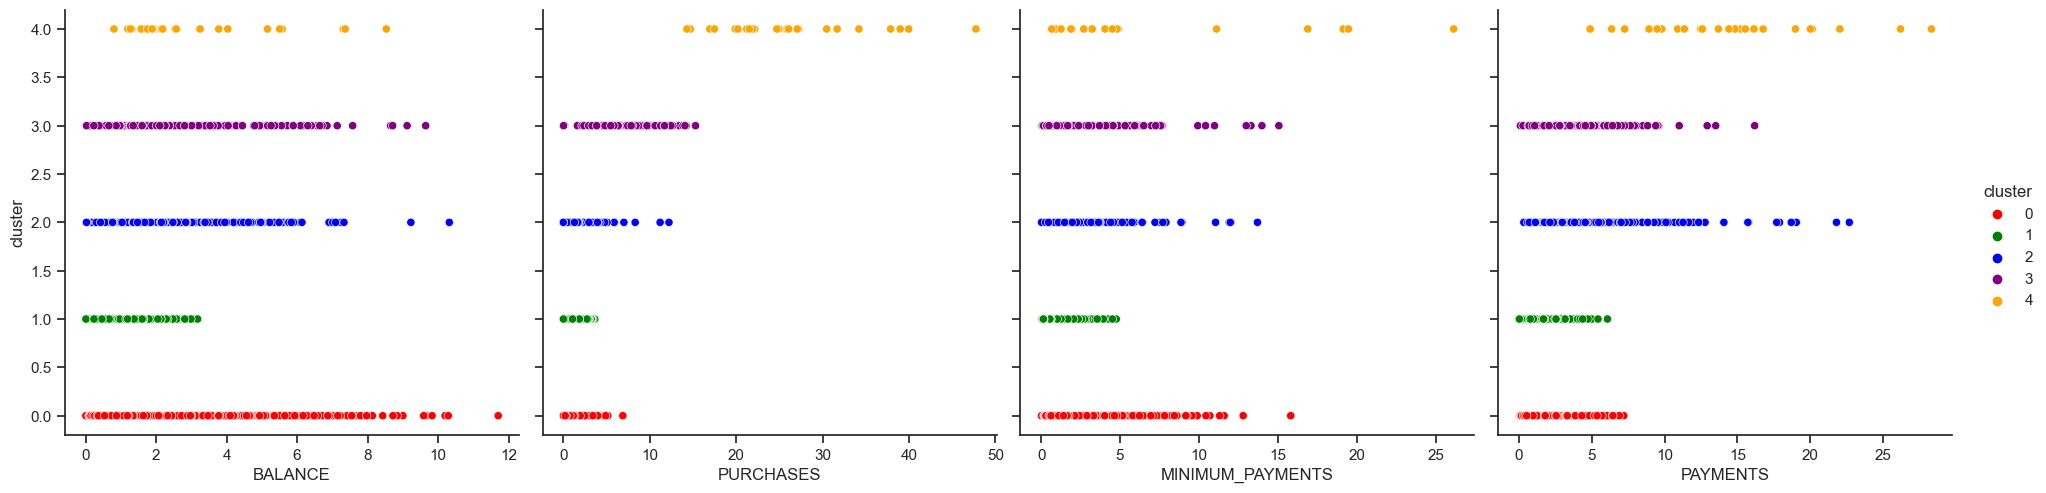

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the custom color palette
custom_palette = ['red', 'green', 'blue', 'purple', 'orange']

# Create a pairplot with the custom color palette
sns.set(style="ticks")
sns.pairplot(df_final, hue='cluster', x_vars=['BALANCE', 'PURCHASES', 'MINIMUM_PAYMENTS', 'PAYMENTS'],
            y_vars=['cluster'], height=5, aspect=1, palette=custom_palette)
plt.show()


c:\Users\oscar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


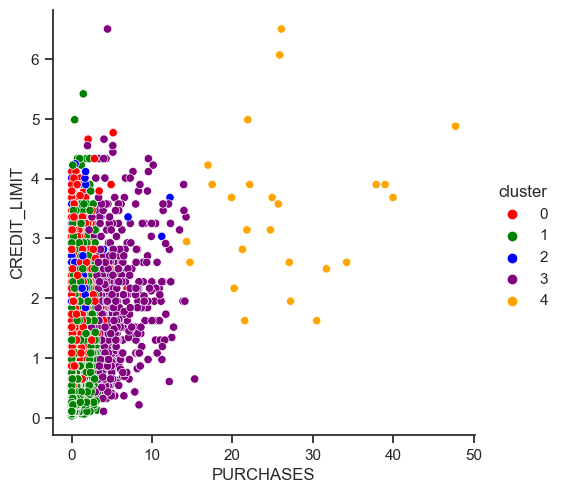

In [39]:
sns.pairplot(df_final, hue='cluster', x_vars=['PURCHASES'], y_vars=['CREDIT_LIMIT'],
            height=5, aspect=1, palette=custom_palette)

In [41]:
mean_df

,cluster,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
0,0,2.847428,0.559669,3.214505,1.593303,1.417159,2.622152
1,1,0.503755,0.600257,0.349497,0.764781,0.550703,0.550600
2,2,3.374965,0.957269,10.911069,2.143828,6.080956,3.014754
3,3,1.520526,5.264854,0.355500,1.814155,2.948144,1.526341
4,4,3.380847,26.190512,1.020801,3.463359,14.554946,5.381282


This cluster has the highest mean balance(3.380847), purchases (26.190512), payments (14.554946) and minimum payments (5.381282). This cluster of users have a lot of outliers by looking at the pairplots and they are easy to cluster. 

### Actionable Insights

The company should provide tailor marketing and engagement strategy to each clusters using the clustering model and provide personalized service to the users.</br>
#### Cluster 1 (Inactive, Cash-Dependent, and Moderate Risk Users):</br>

This cluster has the largest user population (6253). This cluster of user use the credit card mainly for cash access, the bank should consider offering user-friendly cash advance services and quick access to funds.
Implement marketing campaigns and promotions to encourage these users to make more purchases using your credit card.

#### Cluster 0 (Low Financial Activity Users):

While this cluster is smaller than Cluster 1, it's still important (1278 users). The bank should focus on improving the financial knowledge and provide more incentive to encourage these user to have more financial activity. For example, launch educational initiatives, online resources, and mobile apps to help these users understand and utilize credit cards more effectively.
Develop freshmen perks and benefites  programs to attract users who are new to credit or dont want to use it.

#### Cluster 3 (High Balance and Cash-Heavy Consumers):

With 572 users, this cluster presents a valuable opportunity. Bank can offer premium services and benefits to cater to their high balance and cash advance needs.
Create targeted marketing materials emphasizing convenience and and provide high cash back for actively using the credit card  for this user segment.

#### Cluster 2 (The Active Users):

Although smaller in size (162 users), this cluster represents active credit card users. Launch loyalty programs and rewards that encourage continued usage.
Promote other financial products like loans or investment services to enhance their financial engagement.

#### Cluster 4 (High Spending Users):

With 25 users, this is a smaller but high-value segment. Focus on offering premium credit cards with exclusive perks.
Ensure the highest level of security for these users and promoting the importance of credit card security to them, and provide personalized support for their substantial transactions.